<a href="https://colab.research.google.com/github/Dennieeeee/COVID19-Pandemic/blob/master/COVID19_trim_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file='https://raw.githubusercontent.com/Dennieeeee/COVID19-Pandemic/master/covid19_unemployment_2020'
df=pd.read_csv(file)

# Columns
- ALAND: Area of Land (square meters)
- AWATER: Area of Water (square meters)
- NAME: City Name
- State: State
- LaborForce_01Month: Count of people within the US labor force, 1 month prior to current
- Employed_01Month: Count of employed population, 1 month prior to current
- Unemployed_01Month: Count of unemployed population, 1 month prior to current
- PctUnemployed_01Month: Percent unemployed population, 1 month prior to current
- CurrentMonth: Month and year, most current month offered by BLS
- vulnerability_index: Vulnerability Index
- rank_cvi: Rank
- fips_cvi: Fips

In [ ]:
df.head()

,ALAND,AWATER,NAME,State,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,CurrentMonth,vulnerability_index,rank_cvi,fips_cvi
0,1539602137,25706961,Autauga County,Alabama,25835.0,25114.0,721.0,2.8,April 2020 - Preliminary,110.31,401,1001
1,4117621645,1132980868,Baldwin County,Alabama,96391.0,93782.0,2609.0,2.7,April 2020 - Preliminary,146.88,91,1003
2,2292160139,50523213,Barbour County,Alabama,8537.0,8221.0,316.0,3.7,April 2020 - Preliminary,87.78,1455,1005
3,1612167476,9602089,Bibb County,Alabama,8617.0,8348.0,269.0,3.1,April 2020 - Preliminary,69.94,2398,1007
4,1670103866,15015467,Blount County,Alabama,25103.0,24421.0,682.0,2.7,April 2020 - Preliminary,92.04,1224,1009


In [ ]:
#Create a new column
#Employed rate = Employed_01Month/LaborForce_01Month
df['percent_employed']=df['Employed_01Month']/df['LaborForce_01Month']


In [ ]:
df1=df[['State','NAME','LaborForce_01Month','Employed_01Month','Unemployed_01Month','PctUnemployed_01Month','percent_employed']]

In [ ]:
df1.describe()

,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
count,3.090000e+03,3.090000e+03,3090.000000,3090.000000,3090.000000
mean,5.180697e+04,4.945582e+04,2351.149838,4.819029,0.951817
std,1.691945e+05,1.605313e+05,9012.870859,2.053298,0.020529
min,2.080000e+02,1.900000e+02,6.000000,0.800000,0.764973
25%,4.857250e+03,4.603750e+03,227.000000,3.500000,0.943473
50%,1.155850e+04,1.102800e+04,539.500000,4.400000,0.955691
75%,3.129400e+04,3.002500e+04,1450.750000,5.675000,0.965192
max,4.996564e+06,4.669061e+06,327503.000000,23.500000,0.991561


In [ ]:
#Find out the average and median unemployment for each state
df1.groupby('State').agg(['mean','median']).head()

LaborForce_01Month           ... percent_employed          
                         mean   median  ...             mean    median
State                                   ...                           
Alabama          33240.402985  14553.0  ...         0.965245  0.968473
Alaska           12119.678571   2876.0  ...         0.909344  0.911053
Arizona         239230.133333  52093.0  ...         0.916547  0.925280
Arkansas         18373.653333   7960.0  ...         0.942321  0.945182
California      330898.568966  82591.0  ...         0.924069  0.933033

[5 rows x 10 columns]

In [ ]:
df1.head(2)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092
1,Alabama,Baldwin County,96391.0,93782.0,2609.0,2.7,0.972933


# Outliers
Unemployment

In [ ]:
'''
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();
'''

'\nmean, std = np.mean(d1), np.std(d1)\nz_score = np.abs((d1 - mean) / std)\nthreshold = 3\ngood = z_score < threshold\n\nprint(f"Rejection {(~good).sum()} points")\nfrom scipy.stats import norm\nprint(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")\nvisual_scatter = np.random.normal(size=d1.size)\nplt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")\nplt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")\nplt.legend();\n'

In [ ]:
df1.head(1)

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed
0,Alabama,Autauga County,25835.0,25114.0,721.0,2.8,0.972092


Rejection 3090 points
z-score of 3 corresponds to a prob of 0.27%


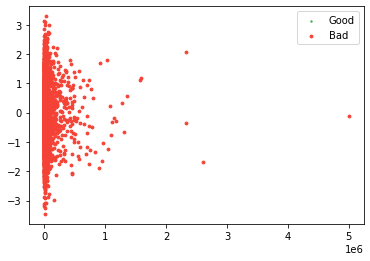

In [ ]:
mean, std=np.mean(df1['LaborForce_01Month']), np.std(df1['LaborForce_01Month'])
z_score = np.abs(df1['LaborForce_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['LaborForce_01Month'].size)
plt.scatter(df1['LaborForce_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['LaborForce_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

Rejection 2635 points
z-score of 3 corresponds to a prob of 0.27%


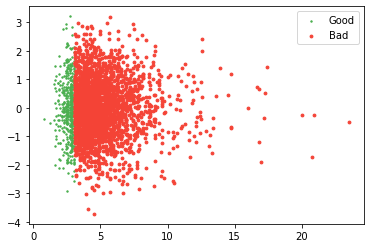

In [ ]:
mean, std=np.mean(df1['PctUnemployed_01Month']), np.std(df1['Unemployed_01Month'])
z_score = np.abs(df1['PctUnemployed_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['PctUnemployed_01Month'].size)
plt.scatter(df1['PctUnemployed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['PctUnemployed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

Rejection 3090 points
z-score of 3 corresponds to a prob of 0.27%


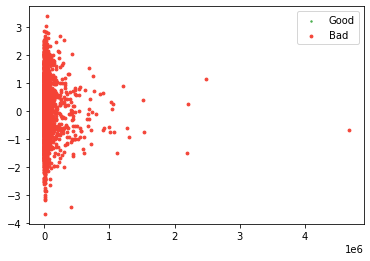

In [ ]:
mean, std=np.mean(df1['Employed_01Month']), np.std(df1['Employed_01Month'])
z_score = np.abs(df1['Employed_01Month']-mean / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=df1['Employed_01Month'].size)
plt.scatter(df1['Employed_01Month'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1['Employed_01Month'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend()

In [ ]:
df1['LaborForce_01Month'] = df1['LaborForce_01Month'][good]
df1['PctUnemployed_01Month']= df1['PctUnemployed_01Month'][good]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


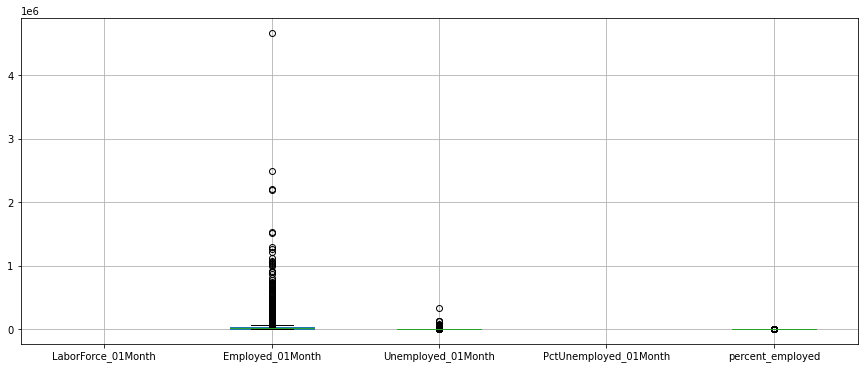

In [ ]:
df1.boxplot(figsize=(15,6))

{'boxes': [<matplotlib.lines.Line2D at 0x7f5759b009e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5759a8d438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5759a8deb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5759a8db38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5759b00cf8>,
  <matplotlib.lines.Line2D at 0x7f5759a8d0b8>]}

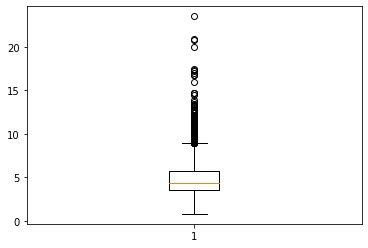

In [ ]:
plt.boxplot(df['PctUnemployed_01Month'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f5759a6e080>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5759a6ea58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5759a7a518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5759a7a198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5759a6e390>,
  <matplotlib.lines.Line2D at 0x7f5759a6e6d8>]}

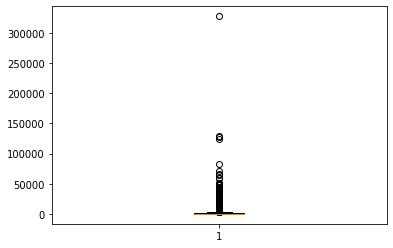

In [ ]:
plt.boxplot(df['Unemployed_01Month'])

# Trim Outliers (Recommended)
Remove outliers on df1_copy version

In [ ]:
#Make a copy version of df1
df1_copy = df1.copy()

In [ ]:
#Trim outliers:
starting_percentile = df1_copy['PctUnemployed_01Month'].quantile(.02)
ending_percentile = df1_copy['PctUnemployed_01Month'].quantile(.98)
price_outliers_df = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] <= starting_percentile) | (df1_copy['PctUnemployed_01Month'] >= ending_percentile))]
df_trimmed = df1_copy.loc[((df1_copy['PctUnemployed_01Month'] > starting_percentile) & (df1_copy['PctUnemployed_01Month'] < ending_percentile))]

In [ ]:
# Drop incomplete cases
df1_copy_filtered = df_trimmed.dropna()

In [ ]:
df1_copy_filtered

,State,NAME,LaborForce_01Month,Employed_01Month,Unemployed_01Month,PctUnemployed_01Month,percent_employed


In [ ]:
print(df1.shape,df1_copy_filtered.shape)

(3090, 7) (0, 7)
